Tutorial : https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br


In [0]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

# Perceptron


In [0]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [6]:
 X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
d = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)
print(perceptron.W)

[-3.  2.  1.]


# Network with perceptron concept


In [8]:
#dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Plot of data**


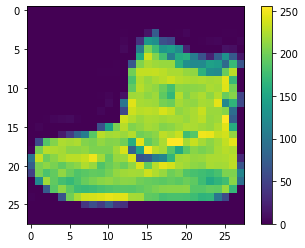

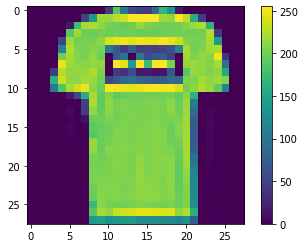

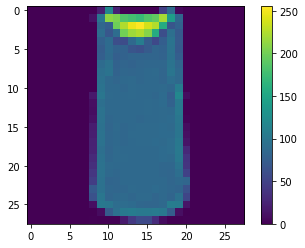

In [15]:
i = 0
while i < 3:
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()
    i+=1

We will scale these values in the range of 0 and 1 before feeding the neural network model. To do that, we divide the values by 255. It is important that the training set and the test set can be preprocessed in the same way:


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Types for cloths


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Define types


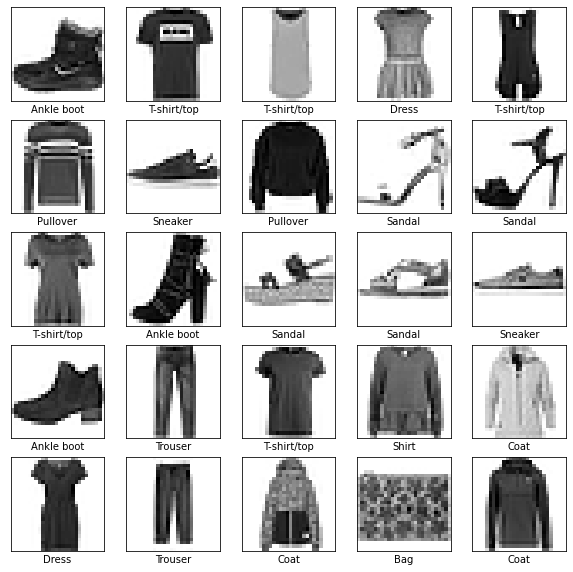

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build Model


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compile Model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Traning with epochs


In [31]:
e1 = model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9092


In [30]:
e2 = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9072
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9076
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9092
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9084
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9090


In [29]:
e3 = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9045
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9040
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9046
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9048
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2636 - accuracy: 0.9060
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2627 - accuracy: 0.9054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9066
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.258

In [37]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9092
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2515 - accuracy: 0.9097
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9093
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.9107
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9110
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9106
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9117
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9119
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2455 - accuracy: 0.9123
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.244

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3502 - accuracy: 0.8792

Test accuracy: 0.8791999816894531


In [0]:
predictions = model.predict(test_images)

In [40]:
predictions[0]


array([5.9352474e-09, 3.4755851e-11, 1.2295321e-07, 1.5036647e-06,
       3.8748340e-07, 8.9177852e-03, 5.2027644e-07, 3.0255348e-03,
       1.3158283e-04, 9.8792261e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])


9

In [43]:
np.argmax(predictions[1])

2

In [44]:
np.argmax(predictions[5])

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

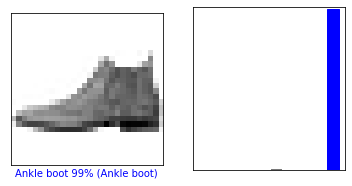

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

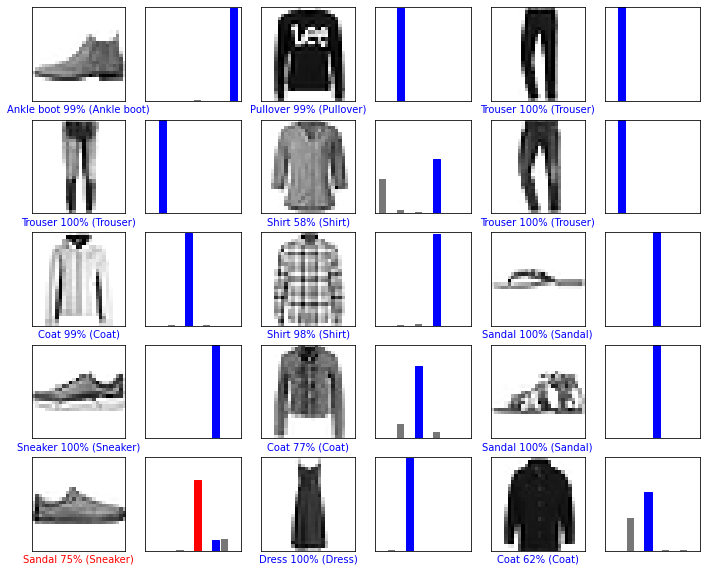

In [47]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()